<a href="https://colab.research.google.com/github/tasneem94/Bioactivity-Predicition-Thesis/blob/main/Thesis_02_Leukocyte_elastase_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## **Load bioactivity data**

In [20]:
! wget https://github.com/tasneem94/Bioactivity-Predicition-Thesis/blob/main/Data/Leukocyte_elastase_03_bioactivity_data_curated.csv

--2022-09-28 12:31:39--  https://github.com/tasneem94/Bioactivity-Predicition-Thesis/blob/main/Data/Leukocyte_elastase_03_bioactivity_data_curated.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Leukocyte_elastase_03_bioactivity_data_curated.csv.2’

Leukocyte_elastase_     [ <=>                ] 821.77K  --.-KB/s    in 0.04s   

2022-09-28 12:31:39 (19.3 MB/s) - ‘Leukocyte_elastase_03_bioactivity_data_curated.csv.2’ saved [841490]



In [21]:
import pandas as pd

In [25]:
df = pd.read_csv('/content/Leukocyte_elastase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL97927,O=C1C[C@H](Cc2ccccc2)N1C(=O)NCc1ccncc1,75000.0,inactive
1,CHEMBL543416,CC(C)[C@@H]1C(=O)N(S(C)(=O)=O)[C@@H]2CCN(C(=O)...,11.0,active
2,CHEMBL95260,CS[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,200.0,active
3,CHEMBL95813,C=CC[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,300.0,active
4,CHEMBL330647,C[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,25000.0,inactive
...,...,...,...,...
2025,CHEMBL4855269,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC(...,1170.0,intermediate
2026,CHEMBL4874616,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC...,5660.0,intermediate
2027,CHEMBL4879313,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OCc...,1350.0,intermediate
2028,CHEMBL4847846,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OC...,2470.0,intermediate


In [26]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [27]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [28]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL97927,75000.0,inactive,O=C1C[C@H](Cc2ccccc2)N1C(=O)NCc1ccncc1
1,CHEMBL543416,11.0,active,CC(C)[C@@H]1C(=O)N(S(C)(=O)=O)[C@@H]2CCN(C(=O)...
2,CHEMBL95260,200.0,active,CS[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1
3,CHEMBL95813,300.0,active,C=CC[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1
4,CHEMBL330647,25000.0,inactive,C[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1
...,...,...,...,...
2025,CHEMBL4855269,1170.0,intermediate,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC(...
2026,CHEMBL4874616,5660.0,intermediate,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC...
2027,CHEMBL4879313,1350.0,intermediate,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OCc...
2028,CHEMBL4847846,2470.0,intermediate,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OC...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [29]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [30]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [31]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,295.342,2.13480,1.0,3.0
1,421.523,0.38570,1.0,7.0
2,341.436,2.47630,1.0,4.0
3,335.407,2.93700,1.0,3.0
4,309.369,2.38080,1.0,3.0
...,...,...,...,...
2025,614.724,5.93920,3.0,6.0
2026,628.751,6.32930,3.0,6.0
2027,649.725,6.76790,2.0,7.0
2028,663.752,7.15800,2.0,7.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [32]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,295.342,2.13480,1.0,3.0
1,421.523,0.38570,1.0,7.0
2,341.436,2.47630,1.0,4.0
3,335.407,2.93700,1.0,3.0
4,309.369,2.38080,1.0,3.0
...,...,...,...,...
2025,614.724,5.93920,3.0,6.0
2026,628.751,6.32930,3.0,6.0
2027,649.725,6.76790,2.0,7.0
2028,663.752,7.15800,2.0,7.0


In [33]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL97927,O=C1C[C@H](Cc2ccccc2)N1C(=O)NCc1ccncc1,75000.0,inactive
1,CHEMBL543416,CC(C)[C@@H]1C(=O)N(S(C)(=O)=O)[C@@H]2CCN(C(=O)...,11.0,active
2,CHEMBL95260,CS[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,200.0,active
3,CHEMBL95813,C=CC[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,300.0,active
4,CHEMBL330647,C[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,25000.0,inactive
...,...,...,...,...
2025,CHEMBL4855269,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC(...,1170.0,intermediate
2026,CHEMBL4874616,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC...,5660.0,intermediate
2027,CHEMBL4879313,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OCc...,1350.0,intermediate
2028,CHEMBL4847846,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OC...,2470.0,intermediate


Now, let's combine the 2 DataFrame

In [34]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [35]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL97927,O=C1C[C@H](Cc2ccccc2)N1C(=O)NCc1ccncc1,75000.0,inactive,295.342,2.13480,1.0,3.0
1,CHEMBL543416,CC(C)[C@@H]1C(=O)N(S(C)(=O)=O)[C@@H]2CCN(C(=O)...,11.0,active,421.523,0.38570,1.0,7.0
2,CHEMBL95260,CS[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,200.0,active,341.436,2.47630,1.0,4.0
3,CHEMBL95813,C=CC[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,300.0,active,335.407,2.93700,1.0,3.0
4,CHEMBL330647,C[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,25000.0,inactive,309.369,2.38080,1.0,3.0
...,...,...,...,...,...,...,...,...
2025,CHEMBL4855269,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC(...,1170.0,intermediate,614.724,5.93920,3.0,6.0
2026,CHEMBL4874616,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC...,5660.0,intermediate,628.751,6.32930,3.0,6.0
2027,CHEMBL4879313,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OCc...,1350.0,intermediate,649.725,6.76790,2.0,7.0
2028,CHEMBL4847846,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OC...,2470.0,intermediate,663.752,7.15800,2.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [36]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [37]:
df_combined.standard_value.describe()

count    2.030000e+03
mean     1.505585e+05
std      1.070213e+06
min      3.600000e-02
25%      2.600000e+00
50%      4.600000e+01
75%      4.175000e+03
max      1.390000e+07
Name: standard_value, dtype: float64

In [38]:
-np.log10( (10**-9)* 100000000 )

1.0

In [39]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [40]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [41]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL97927,O=C1C[C@H](Cc2ccccc2)N1C(=O)NCc1ccncc1,inactive,295.342,2.13480,1.0,3.0,75000.0
1,CHEMBL543416,CC(C)[C@@H]1C(=O)N(S(C)(=O)=O)[C@@H]2CCN(C(=O)...,active,421.523,0.38570,1.0,7.0,11.0
2,CHEMBL95260,CS[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,active,341.436,2.47630,1.0,4.0,200.0
3,CHEMBL95813,C=CC[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,active,335.407,2.93700,1.0,3.0,300.0
4,CHEMBL330647,C[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,inactive,309.369,2.38080,1.0,3.0,25000.0
...,...,...,...,...,...,...,...,...
2025,CHEMBL4855269,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC(...,intermediate,614.724,5.93920,3.0,6.0,1170.0
2026,CHEMBL4874616,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC...,intermediate,628.751,6.32930,3.0,6.0,5660.0
2027,CHEMBL4879313,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OCc...,intermediate,649.725,6.76790,2.0,7.0,1350.0
2028,CHEMBL4847846,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OC...,intermediate,663.752,7.15800,2.0,7.0,2470.0


In [42]:
df_norm.standard_value_norm.describe()

count    2.030000e+03
mean     1.505585e+05
std      1.070213e+06
min      3.600000e-02
25%      2.600000e+00
50%      4.600000e+01
75%      4.175000e+03
max      1.390000e+07
Name: standard_value_norm, dtype: float64

In [43]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL97927,O=C1C[C@H](Cc2ccccc2)N1C(=O)NCc1ccncc1,inactive,295.342,2.13480,1.0,3.0,4.124939
1,CHEMBL543416,CC(C)[C@@H]1C(=O)N(S(C)(=O)=O)[C@@H]2CCN(C(=O)...,active,421.523,0.38570,1.0,7.0,7.958607
2,CHEMBL95260,CS[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,active,341.436,2.47630,1.0,4.0,6.698970
3,CHEMBL95813,C=CC[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,active,335.407,2.93700,1.0,3.0,6.522879
4,CHEMBL330647,C[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,inactive,309.369,2.38080,1.0,3.0,4.602060
...,...,...,...,...,...,...,...,...
2025,CHEMBL4855269,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC(...,intermediate,614.724,5.93920,3.0,6.0,5.931814
2026,CHEMBL4874616,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)NC...,intermediate,628.751,6.32930,3.0,6.0,5.247184
2027,CHEMBL4879313,CC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OCc...,intermediate,649.725,6.76790,2.0,7.0,5.869666
2028,CHEMBL4847846,CCC(C)C(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OC...,intermediate,663.752,7.15800,2.0,7.0,5.607303


In [44]:
df_final.pIC50.describe()

count    2030.000000
mean        6.930723
std         1.832274
min         1.856985
25%         5.379367
50%         7.337242
75%         8.585027
max        10.443697
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [45]:
df_final.to_csv('Leukocyte_elastase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [46]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL97927,O=C1C[C@H](Cc2ccccc2)N1C(=O)NCc1ccncc1,inactive,295.342,2.1348,1.0,3.0,4.124939
1,CHEMBL543416,CC(C)[C@@H]1C(=O)N(S(C)(=O)=O)[C@@H]2CCN(C(=O)...,active,421.523,0.3857,1.0,7.0,7.958607
2,CHEMBL95260,CS[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,active,341.436,2.4763,1.0,4.0,6.698970
3,CHEMBL95813,C=CC[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,active,335.407,2.9370,1.0,3.0,6.522879
4,CHEMBL330647,C[C@@H]1C(=O)N(C(=O)NCc2ccncc2)[C@H]1Cc1ccccc1,inactive,309.369,2.3808,1.0,3.0,4.602060
...,...,...,...,...,...,...,...,...
2016,CHEMBL4874099,CC(C)C(NC(=O)Cn1cccc(NC(=O)Oc2ccccc2)c1=O)P(=O...,inactive,575.558,5.9086,2.0,8.0,4.892451
2019,CHEMBL4878469,CCC(C)C(NC(=O)Cn1cccc(NC(=O)Oc2ccccc2)c1=O)P(=...,inactive,589.585,6.2987,2.0,8.0,4.783043
2020,CHEMBL4856083,CCC(C)C(NC(=O)C(C)n1cccc(NC(=O)Oc2ccccc2)c1=O)...,inactive,603.612,6.8597,2.0,8.0,4.668168
2021,CHEMBL4849209,CCC(C)C(NC(=O)C(C)n1cccc(NC(=O)OC(C)(C)C)c1=O)...,inactive,583.622,6.5958,2.0,8.0,4.873869


Let's write this to CSV file.

In [47]:
df_2class.to_csv('Leukocyte_elastase_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [48]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

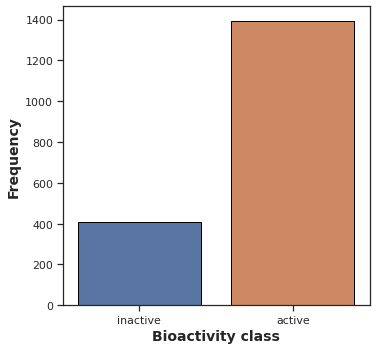

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

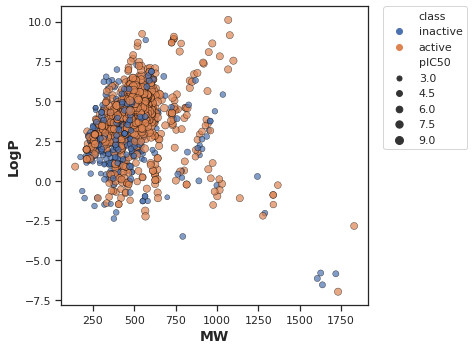

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

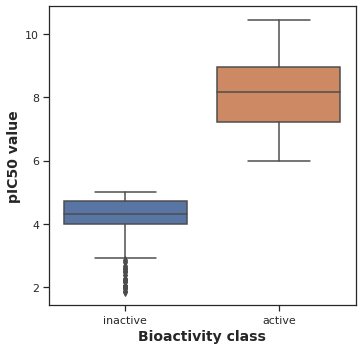

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [52]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [53]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,570555.0,4.108338e-209,0.05,Different distribution (reject H0)


#### **MW**

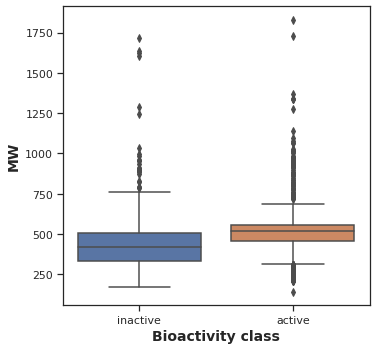

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [55]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,399998.0,3.210973e-35,0.05,Different distribution (reject H0)


#### **LogP**

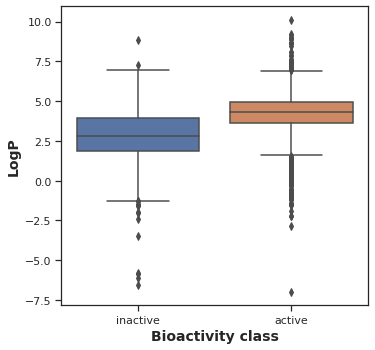

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [57]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,418654.0,5.380402e-47,0.05,Different distribution (reject H0)


#### **NumHDonors**

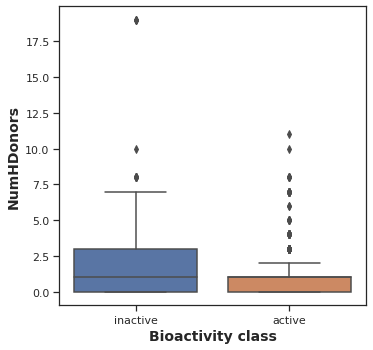

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [59]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,238772.0,9.326357e-08,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

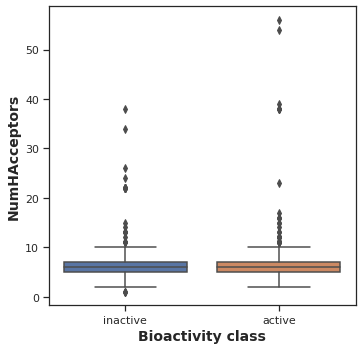

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [61]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,270459.0,0.102017,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [62]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: Leukocyte_elastase_05_bioactivity_data_2class_pIC50.csv (deflated 81%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: Leukocyte_elastase_04_bioactivity_data_3class_pIC50.csv (deflated 81%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: Leukocyte_elastase_03_bioactivity_data_curated.csv (deflated 86%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_NumHDonors.pdf (deflated 39%)
